# Movies Analysis

**Imports**
- Pandas
- Matplotlib
- Movie Requests

In [519]:
import pandas as pd
import matplotlib.pyplot as plt
import movie_requests as mrs

**Data**
- Fetch OMBd data for 'oscar_winners.csv' and 'python_winners.csv'.
- Save combined data as 'movies.csv' in 'data'.
- Load 'movies.csv' into a DataFrame.

In [520]:
project_movies = mrs.res_omdb_data('oscar_winners.csv')
python_movies = mrs.res_omdb_data('python_winners.csv')
mrs.save_to_csv('movies.csv', project_movies + python_movies)
movies = pd.read_csv('data/movies.csv')

## Question 9.1
(Graph) What was the runtine for each movie?

**Strategy:**
- Sort the movies by runtime in descending order
- Make a list of the movie titles and runtimes


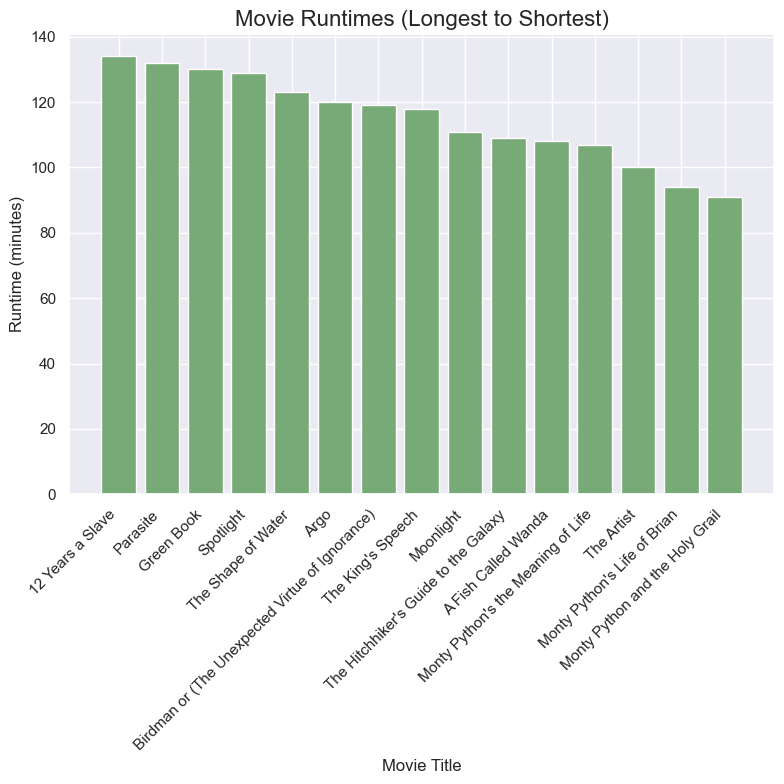

In [ ]:
# Calculation
movies_sorted = movies.sort_values(by='Runtime', ascending=False)
sorted_titles = movies_sorted['Movie Title'].tolist()
sorted_runtimes = movies_sorted['Runtime'].tolist()


# # Bar Plot
plt.figure(figsize=(8, 7))
plt.bar(sorted_titles, sorted_runtimes, color='#77AA77')
plt.xlabel('Movie Title', fontsize=12)
plt.ylabel('Runtime (minutes)', fontsize=12)
plt.title('Movie Runtimes (Longest to Shortest)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Question 9.2
What movie had the longest runtime?

**Answer:**

Based on the bar plot above, the movie with the longest runtime is 12 Years a Slave, with a runtime of 134 minutes.

## Question 9.3
Is there any relationship between the length of the movie (runtime) and the number of awards a movie won?

**Strategy:**
- Calculate correlation coefficient.

In [522]:
runtime_award_corr = movies['Runtime'].corr(movies['Award Wins'])
print(f"Correlation Coefficient: {runtime_award_corr:.2f}")

Correlation Coefficient: 0.60


**Answer:**

Yes, there is a positive linear correlation between runtime and award wins, with a correlation coefficient of 0.60. This moderate positive correlation suggests that as a movie's runtime increases, it tends to win more awards, though other factors may also play a role.

## Question 9.4
(Graph) How many awards and nominations did each movie receive?

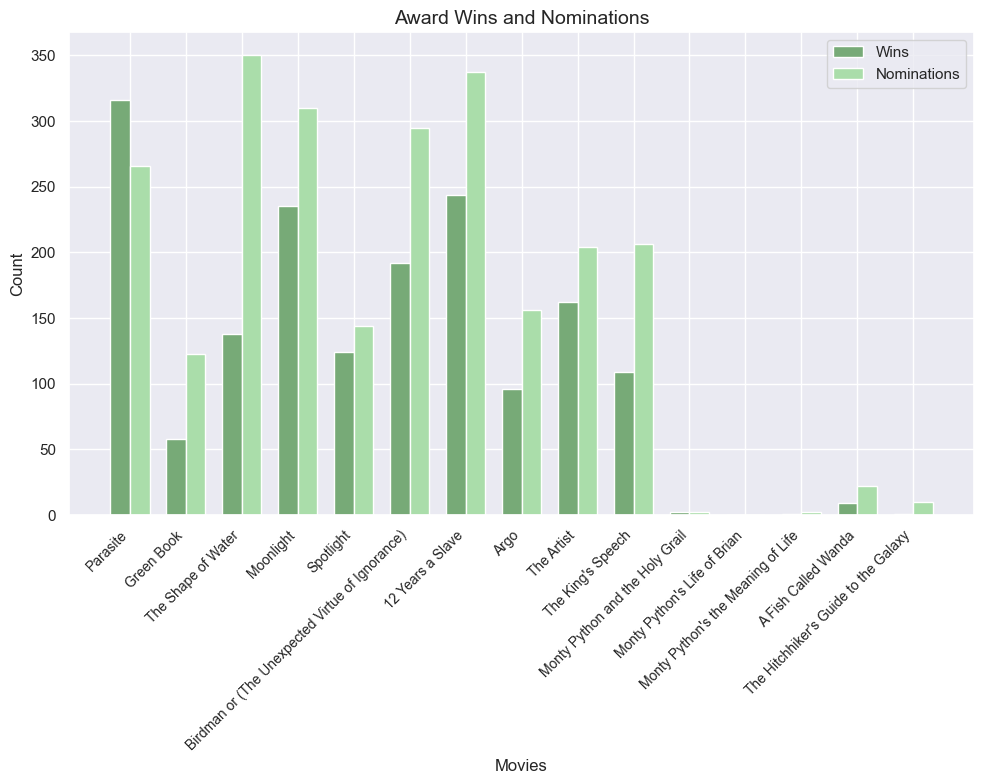

In [523]:
# Calculatons
titles, wins, noms = movies['Movie Title'], movies['Award Wins'], movies['Award Nominations']


# Double Bar Plot
fig, ax = plt.subplots(figsize=(10, 8))
positions = list(range(len(titles)))
ax.bar([p - 0.35/2 for p in positions], wins, 0.35, label='Wins', color='#77AA77')
ax.bar([p + 0.35/2 for p in positions], noms, 0.35, label='Nominations', color='#AADDAA')
ax.set_title('Award Wins and Nominations', fontsize=14)
ax.set_ylabel('Count', fontsize=12)
ax.set_xlabel('Movies', fontsize=12)
ax.set_xticks(positions)
ax.set_xticklabels(titles, rotation=45, ha='right', fontsize=10)
ax.legend()
plt.tight_layout()
plt.show()


## Extra Credit Question 3.1
Is there a relationship between the amount of box office earnings a movie had and the amount of total nominations the movie received (total nominations = awards wins + award nominations)?

In [524]:
runtime_award_corr = movies['Box Office'].corr(movies['Award Wins']+movies['Award Nominations'])
print(f"Correlation Coefficient: {runtime_award_corr:.2f}")

Correlation Coefficient: 0.19


## Extra Credit Question 3.2
Is there a relationship between box office earnings and movie runtimes?

In [525]:
runtime_award_corr = movies['Box Office'].corr(movies['Runtime'])
print(f"Correlation Coefficient: {runtime_award_corr:.2f}")

Correlation Coefficient: 0.48


## Extra Credit Question 3.3
(Graph) How much did each movie earn at the box office?

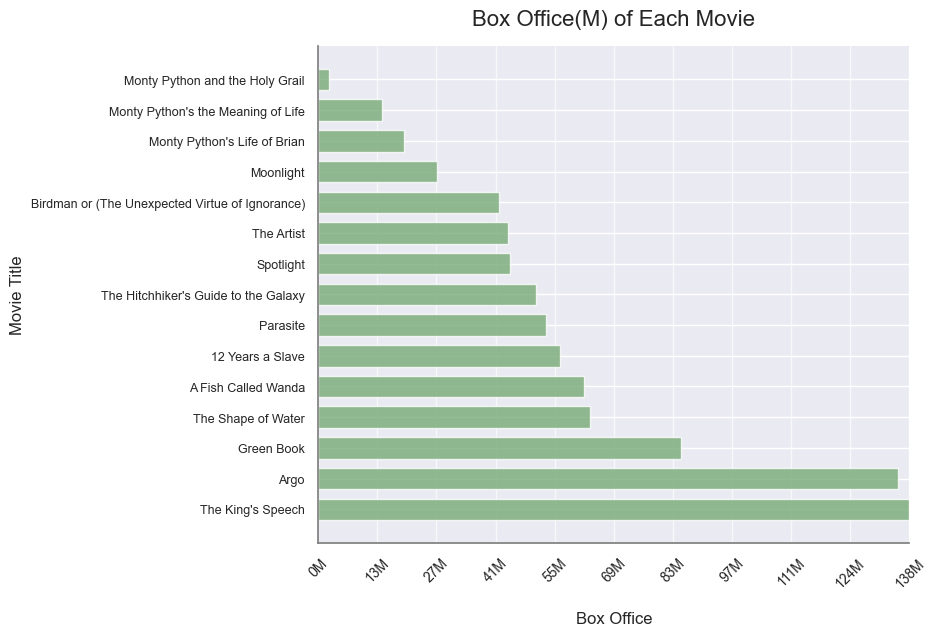

In [526]:
# Calculation
movies_sorted = movies.sort_values(by='Box Office', ascending=False)
sorted_titles = movies_sorted['Movie Title'].tolist()
sorted_box_office = movies_sorted['Box Office'].tolist()
max_value = max(sorted_box_office)
step_size = max_value // 10


# Horizontal Bar Plot
plt.figure(figsize=(10, 7))
plt.barh(
    sorted_titles,
    sorted_box_office,
    color='#77AA77',
    alpha=0.8,
    edgecolor='#ffffff',
    height=0.7
)
plt.xlabel('Box Office', fontsize=12, labelpad=15)
plt.ylabel('Movie Title', fontsize=12)
plt.title('Box Office(M) of Each Movie', fontsize=16, pad=15)
plt.xticks(range(0, max_value + step_size, step_size), fontsize=10, rotation=45)
plt.yticks(fontsize=9)
plt.xlim(0, max_value)
plt.grid(axis='x', linestyle='-', color='#ffffff', alpha=0.7)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.xaxis.set_major_formatter(lambda x, pos: f'{int(x/1_000_000)}M')
plt.tight_layout(pad=2.5)
plt.show()

## Extra Credit Question 3.4
(Graph) What is the total count of each genre present in the dataset? (How many times does fantasy, drama, adventure, etc. show up)

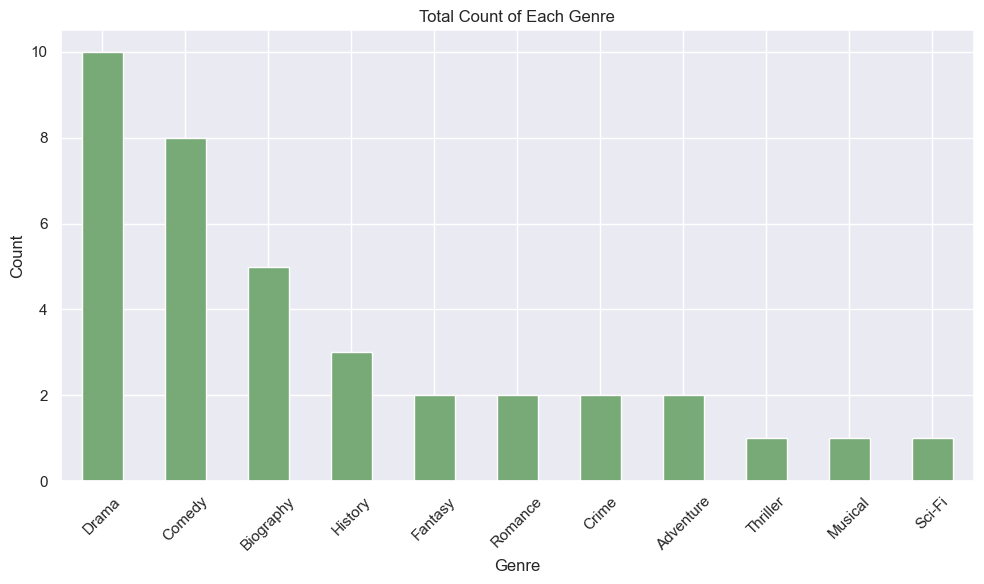

In [527]:
# Calculations
genre_counts = movies['Genre'].str.split(', ').explode().value_counts()


# Plot
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='#77AA77')
plt.title('Total Count of Each Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()